In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV


In [2]:
df = pd.read_pickle('../data/theft-street.p')
#df.head(3)

In [3]:
df['month'] = df.date.apply(lambda x: x.month)
df['year'] = df.date.apply(lambda x: x.year)
df.head(3)

,address,date,dayofweek,descript,time,x,y,nhood,tractce10,police_district,hist_police_district,month,year
0,700 Block of BROADWAY ST,2010-01-01,Friday,ATTEMPTED GRAND THEFT FROM PERSON,05:45:00,-122.409987,37.797511,Chinatown,010700,CENTRAL,CENTRAL,1,2010
1,THE EMBARCADEROSOUTH ST / TOWNSEND ST,2010-01-01,Friday,PETTY THEFT OF PROPERTY,01:00:00,-122.388306,37.781798,Financial District,061500,SOUTHERN,SOUTHERN,1,2010
2,1600 Block of THE EMBARCADERONORTH ST,2010-01-01,Friday,GRAND THEFT FROM PERSON,01:00:00,-122.410774,37.808435,North Beach,010100,CENTRAL,CENTRAL,1,2010


## Join weather and robberies

In [4]:
weather = pd.read_pickle(r"../data/noaa-weather-downtown-sf.p")
weather.head(3)

,DATE,PRCP,TMAX,TMIN
0,2003-01-01,0.0,15.0,7.8
1,2003-01-02,0.0,13.9,8.9
2,2003-01-03,0.0,17.2,8.3


In [5]:
print df.shape
df = df.merge(weather,how="inner",left_on="date",right_on="DATE")
print df.shape
df.head(3)


(65003, 13)
(65003, 17)


,address,date,dayofweek,descript,time,x,y,nhood,tractce10,police_district,hist_police_district,month,year,DATE,PRCP,TMAX,TMIN
0,700 Block of BROADWAY ST,2010-01-01,Friday,ATTEMPTED GRAND THEFT FROM PERSON,05:45:00,-122.409987,37.797511,Chinatown,010700,CENTRAL,CENTRAL,1,2010,2010-01-01,1.3,14.4,11.1
1,THE EMBARCADEROSOUTH ST / TOWNSEND ST,2010-01-01,Friday,PETTY THEFT OF PROPERTY,01:00:00,-122.388306,37.781798,Financial District,061500,SOUTHERN,SOUTHERN,1,2010,2010-01-01,1.3,14.4,11.1
2,1600 Block of THE EMBARCADERONORTH ST,2010-01-01,Friday,GRAND THEFT FROM PERSON,01:00:00,-122.410774,37.808435,North Beach,010100,CENTRAL,CENTRAL,1,2010,2010-01-01,1.3,14.4,11.1


## Aggregate by year, ignoring 2016

In [6]:
df.year.value_counts()

2013    7513
2012    7049
2014    6886
2015    6641
2011    5663
2010    4263
2009    4139
2003    3921
2008    3816
2005    3612
2007    3539
2006    3441
2004    3189
2016    1331
Name: year, dtype: int64

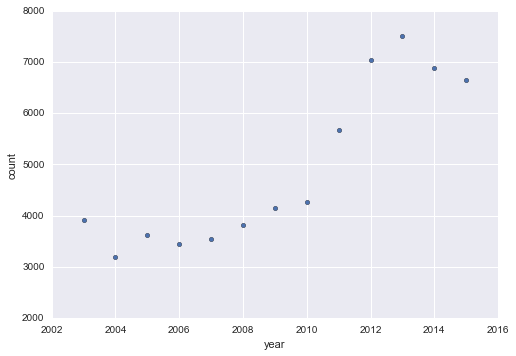

In [7]:
temp = df[df.year < 2016].year.value_counts().to_frame(name="count")
temp['year'] = temp.index
temp.plot(kind="scatter",x="year",y="count")

## Aggregate by month, ignoring 2016

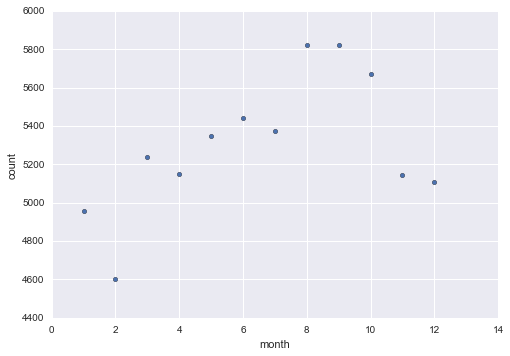

In [8]:
temp = df[df.year < 2016].month.value_counts().to_frame(name="count")
temp['month'] = temp.index
temp.plot(kind="scatter",x="month",y="count")

## Aggregate by time of date

In [9]:
def time2num(t):
    ts = t.hour * 60 + t.minute
    return ts

def num2time(ts):
    minute = ts % 60
    hour = (ts - minute) / 60
    return datetime.time(hour,minute)

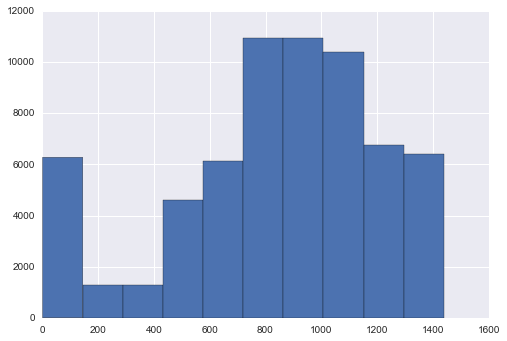

In [10]:
p = df.time.apply(time2num).hist()

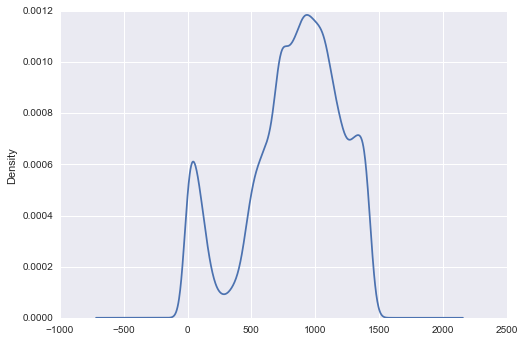

In [11]:
p = df.time.apply(time2num).plot.kde()


## Aggregate by day of week

Saturday     11057
Friday       10659
Thursday      9089
Sunday        8993
Wednesday     8839
Tuesday       8393
Monday        7973
Name: dayofweek, dtype: int64


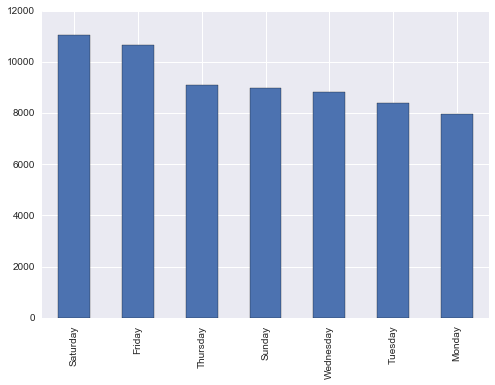

In [12]:
print df.dayofweek.value_counts()
p = df.dayofweek.value_counts().plot.bar()

## by TMAX

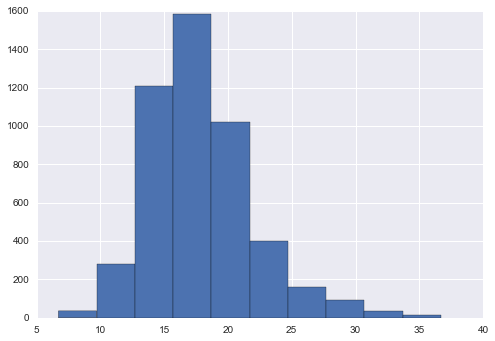

In [14]:
weather.TMAX.hist()

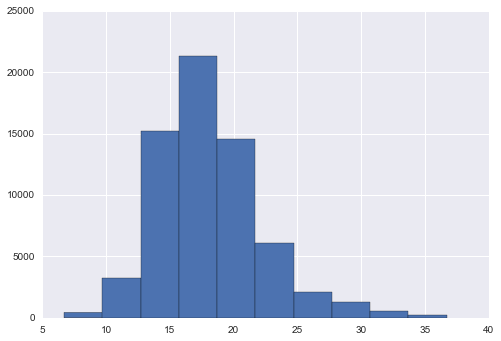

In [13]:
p = df.TMAX.hist()

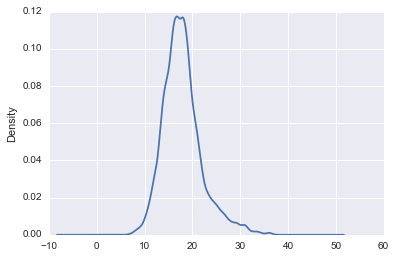

In [104]:
p = df.TMAX.plot.kde()

## By location

In [50]:
np.histogram2d(df.x,df.y)

(array([[  2.50850000e+04,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
      

In [46]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=5) # 20-fold cross-validation
grid.fit(df[['x','y']])
print grid.best_params_
kde = grid.best_estimator_

{'bandwidth': 0.3172413793103448}


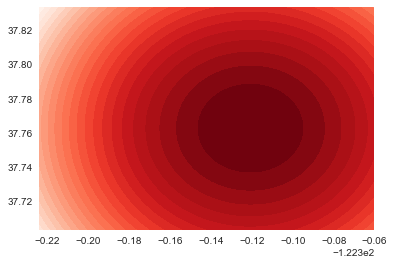

In [48]:
xmin = -122.5237517
xmax = -122.3602017
ymin = 37.7040012
ymax = 37.8341382

xv, yv = np.meshgrid(np.linspace(xmin,xmax,num=200),np.linspace(ymin,ymax,num=200))

X_grid = np.vstack([xv.ravel(), yv.ravel()]).transpose()



Z = kde.score_samples(X_grid)
Z = Z.reshape(xv.shape)

levels = np.linspace(Z.min(), Z.max(), 25)
plt.contourf(xv, yv, Z, levels=levels, cmap=plt.cm.Reds)